<div style="width:90%;
            margin:10px;
            padding:8px;
            border:2px solid #FF0000;
            border-radius:20px;
            font-weight:bold;
            font-size:2.5em;
            text-align:center;">
 The Consumption Savings Problem
</div>


<div style="width:90%;
            margin:9px;
            font-size:1em;">
            
*The Consumption Savings Problem:* This problem is about a household endowed with B0​ dollars of wealth must decide how much to consume and save to maximize its utility over its finite lifecycle.
The problem is inspired from the following: [Tutorial](https://infiniteopt.github.io/InfiniteOpt.jl/stable/examples/Optimal%20Control/consumption_savings/#Consumption-Savings-Problem).                             
We solve the problem using the [InfiniteOpt.jl](https://infiniteopt.github.io/InfiniteOpt.jl/stable/) and [OptimalControl](https://control-toolbox.org/OptimalControl.jl/stable/) packages in Julia then we compare the results.

1. [InfiniteOpt Formulation](#jump)
2. [OptimalControl Formulation](#oc)
3. [Comparison](#comp)

</div>

In [1]:
import Pkg
Pkg.activate("..")
using MKL

  Activating project at `c:\Users\hajje\Dropbox\PC\Desktop\Stage\COTS`


## 1. Solving with InfiniteOpt <a id='jump'></a>

In [2]:
using InfiniteOpt, Ipopt
include("consumption_savings_InfOpt.jl");

In [3]:
modelInfOpt= consumption_savings_InfOpt(;nh=1000)

An InfiniteOpt Model
Maximization problem with:
Finite Parameters: 0
Infinite Parameter: 1
Variables: 4
Derivative: 1
Measure: 1
Objective function type: GeneralVariableRef
`GenericAffExpr{Float64, GeneralVariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 3 constraints
Names registered in the model: B, c, c1, t
Optimizer model backend information: 
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [4]:
optimize!(modelInfOpt)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     5999
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1000

Total number of variables............................:     3000
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2001
Total number of inequality c

## 2. Solving with OptimalControl <a id='oc'></a>

In [5]:
using OptimalControl
include("consumption_savings_OC.jl");

In [6]:
docp, model = consumption_savings_OC(;nh=1000)

(CTDirect.DOCP(OptimalControlModel{NonAutonomous, Fixed}
  model_expression: Expr
  initial_time: Int64 0
  initial_time_name: String "0"
  final_time: Float64 10.0
  final_time_name: String "10.0"
  time_name: String "t"
  control_dimension: Int64 1
  control_components_names: Array{String}((1,))
  control_name: String "u"
  state_dimension: Int64 1
  state_components_names: Array{String}((1,))
  state_name: String "x"
  variable_dimension: Nothing nothing
  variable_components_names: Nothing nothing
  variable_name: Nothing nothing
  lagrange: CTBase.Lagrange{NonAutonomous, Fixed}
  mayer: Nothing nothing
  criterion: Symbol max
  dynamics: CTBase.Dynamics{NonAutonomous, Fixed}
  constraints: Dict{Symbol, Tuple}
  dim_control_constraints: Int64 0
  dim_state_constraints: Int64 0
  dim_mixed_constraints: Int64 0
  dim_boundary_constraints: Int64 2
  dim_variable_constraints: Int64 0
  dim_control_range: Int64 0
  dim_state_range: Int64 0
  dim_variable_range: Int64 0
, (Real[], CTBase

In [7]:
using NLPModelsIpopt
nlp_sol = ipopt(model)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     8003
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1001

Total number of variables............................:     3003
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2003
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e+02 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

"Execution stats: first-order stationary"

## 3. Comparison <a id='comp'></a>

### + Plots

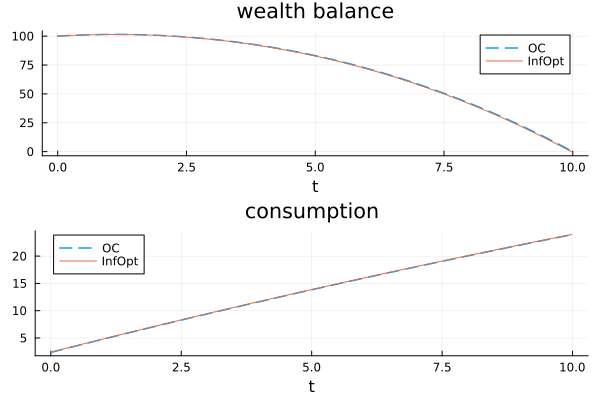

In [8]:
using Plots
c_opt = value(modelInfOpt[:c])
B_opt = value(modelInfOpt[:B])
ts = supports(modelInfOpt[:t])
ix = 2:(length(ts)-1) 
sol = OptimalControlSolution(docp; primal=nlp_sol.solution, dual=nlp_sol.multipliers)

p1 = plot(plot(sol)[1], linestyle=:dash, title = "wealth balance", label = "OC", linewidth=1.5);
p1 = plot!(ts[ix], B_opt[ix], title = "wealth balance", label = "InfOpt");

p2 = plot(plot(sol)[3], linestyle=:dash, title = "consumption", label = "OC", linewidth=1.5);
p2 = plot!(ts[ix], c_opt[ix], title = "consumption", label = "InfOpt");

plot(p1, p2, layout = (2, 1))

### + Benchmark

In [9]:
using BenchmarkTools
set_optimizer_attribute(modelInfOpt, "print_level", 0)
@benchmark optimize!(modelInfOpt)

BenchmarkTools.Trial: 792 samples with 1 evaluation.
 Range (min … max):  5.486 ms …   9.938 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     6.198 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   6.296 ms ± 479.268 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

        ▁▁ ▄▆▇█▆▆▇▆▃▂▃▁ ▁                                      
  ▃▃▃▄▄▆██▇████████████▇█▆▆▇▆▅▄▅▅▄▄▃▃▃▃▃▃▃▁▃▁▃▃▃▂▃▂▁▁▁▁▁▁▁▂▁▃ ▄
  5.49 ms         Histogram: frequency by time        8.21 ms <

 Memory estimate: 3.59 KiB, allocs estimate: 154.

In [10]:
@benchmark ipopt(model, print_level=0)

BenchmarkTools.Trial: 144 samples with 1 evaluation.
 Range (min … max):  25.931 ms … 445.067 ms  ┊ GC (min … max):  0.00% … 86.96%
 Time  (median):     29.764 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   34.806 ms ±  34.961 ms  ┊ GC (mean ± σ):  13.80% ± 12.50%

   ▅▃█▅▁▅▄  ▂                                                   
  ▇███████▇▇██▆█▅▃▃▁▁▁▁▁▁▁▅▄▃▄▄▄▇▁▄▁▁▄▃▁▁▁▁▁▁▁▁▁▁▁▃▁▃▁▁▃▁▁▁▁▁▃ ▃
  25.9 ms         Histogram: frequency by time         57.5 ms <

 Memory estimate: 15.29 MiB, allocs estimate: 480946.